# YOUR PROJECT TITLE

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **data analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `dataproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [58]:
#%pip install pandas-datareader
#%pip install git+https://github.com/alemartinello/dstapi
import numpy as np
import pandas as pd
import datetime

import pandas_datareader # install with `pip install pandas-datareader`
from dstapi import DstApi # install with `pip install git+https://github.com/alemartinello/dstapi`

import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})


# Read and clean data

In [64]:
trade = DstApi('UHM') 
tabsum = trade.tablesummary(language='en')
display(tabsum)

# The available values for a each variable: 
for variable in tabsum['variable name']:
    print(variable+':')
    display(trade.variable_levels(variable, language='en'))

params = trade._define_base_params(language='en')  # Returns a view, that we can edit
params

variables = params['variables']
variables[0]['values'] = ['1.A']
variables[1]['values'] =['1']
variables[2]['values'] = ['W1']
variables[3]['values'] = ['93']
variables[4]['values'] = ['2']
variables[5]['values'] = ['2022M01', '2022M02', '2022M03', '2022M04', '2022M05', '2022M06', '2022M07', '2022M08', '2022M09', '2022M10', '2022M11', '2022M12',
'2023M01', '2023M02', '2023M03', '2023M04', '2023M05', '2023M06', '2023M07', '2023M08', '2023M09', '2023M10', '2023M11', '2023M12',
'2024M01', '2024M02']
params

data = trade.get_data(params=params)
data.head(5)


Table UHM: External trade monthly by items, imports and exports, country, unit, seasonal adjustment and time
Last update: 2024-04-09T08:00:00


,variable name,# values,First value,First value label,Last value,Last value label,Time variable
0,POST,23,1.A,GOODS AND SERVICES,1.A.B.X,Other services,False
1,INDUD,2,1,Imports,2,Exports,False
2,LAND,11,W1,REST OF THE WORLD,CN,China,False
3,ENHED,4,93,Million DKK,102,Percentage change (year),False
4,SÆSON,2,1,Non-seasonally adjusted,2,Seasonally adjusted,False
5,Tid,170,2010M01,2010M01,2024M02,2024M02,True


POST:


,id,text
0,1.A,GOODS AND SERVICES
1,1.A.A,GOODS (FOB)
2,1.A.A.1.Z,GOODS THAT CROSSES DANISH BORDERS
3,1.A.A.1.0-4X2-3,"Live animals, Food, Beverages And Tobacco"
4,1.A.A.1.2,"Crude Materials, Inedible, Except Fuels"
5,1.A.A.1.3,"Mineral Fuels, Lubricants And Related Materials"
6,1.A.A.1.5,Chemicals And Related Products
7,1.A.A.1.6,Manufactured Goods Classified Chiefly By Material
8,1.A.A.1.7X78-79,Machinery (excl. Transport Equipment)
9,1.A.A.1.78-79,"Transport Equipment (excl. Vessels, aircraft e..."


INDUD:


,id,text
0,1,Imports
1,2,Exports


LAND:


,id,text
0,W1,REST OF THE WORLD
1,B6,EU-27 (without the United Kingdom)
2,FR,France
3,NL,Netherlands
4,SE,Sweden
5,DE,Germany
6,D6,Extra EU-27
7,NO,Norway
8,GB,United Kingdom
9,US,United States


ENHED:


,id,text
0,93,Million DKK
1,100,Percentage change (month)
2,101,Percentage change (3 months)
3,102,Percentage change (year)


SÆSON:


,id,text
0,1,Non-seasonally adjusted
1,2,Seasonally adjusted


Tid:


,id,text
0,2010M01,2010M01
1,2010M02,2010M02
2,2010M03,2010M03
3,2010M04,2010M04
4,2010M05,2010M05
...,...,...
165,2023M10,2023M10
166,2023M11,2023M11
167,2023M12,2023M12
168,2024M01,2024M01


,POST,INDUD,LAND,ENHED,SÆSON,TID,INDHOLD
0,GOODS AND SERVICES,Imports,REST OF THE WORLD,Million DKK,Seasonally adjusted,2022M01,126789.4
1,GOODS AND SERVICES,Imports,REST OF THE WORLD,Million DKK,Seasonally adjusted,2022M02,124966.4
2,GOODS AND SERVICES,Imports,REST OF THE WORLD,Million DKK,Seasonally adjusted,2022M03,133248.7
3,GOODS AND SERVICES,Imports,REST OF THE WORLD,Million DKK,Seasonally adjusted,2022M04,139747.5
4,GOODS AND SERVICES,Imports,REST OF THE WORLD,Million DKK,Seasonally adjusted,2022M05,139862.3


## Explore each data set

In order to be able to **explore the raw data**, you may provide **static** and **interactive plots** to show important developments 

**Interactive plot** :

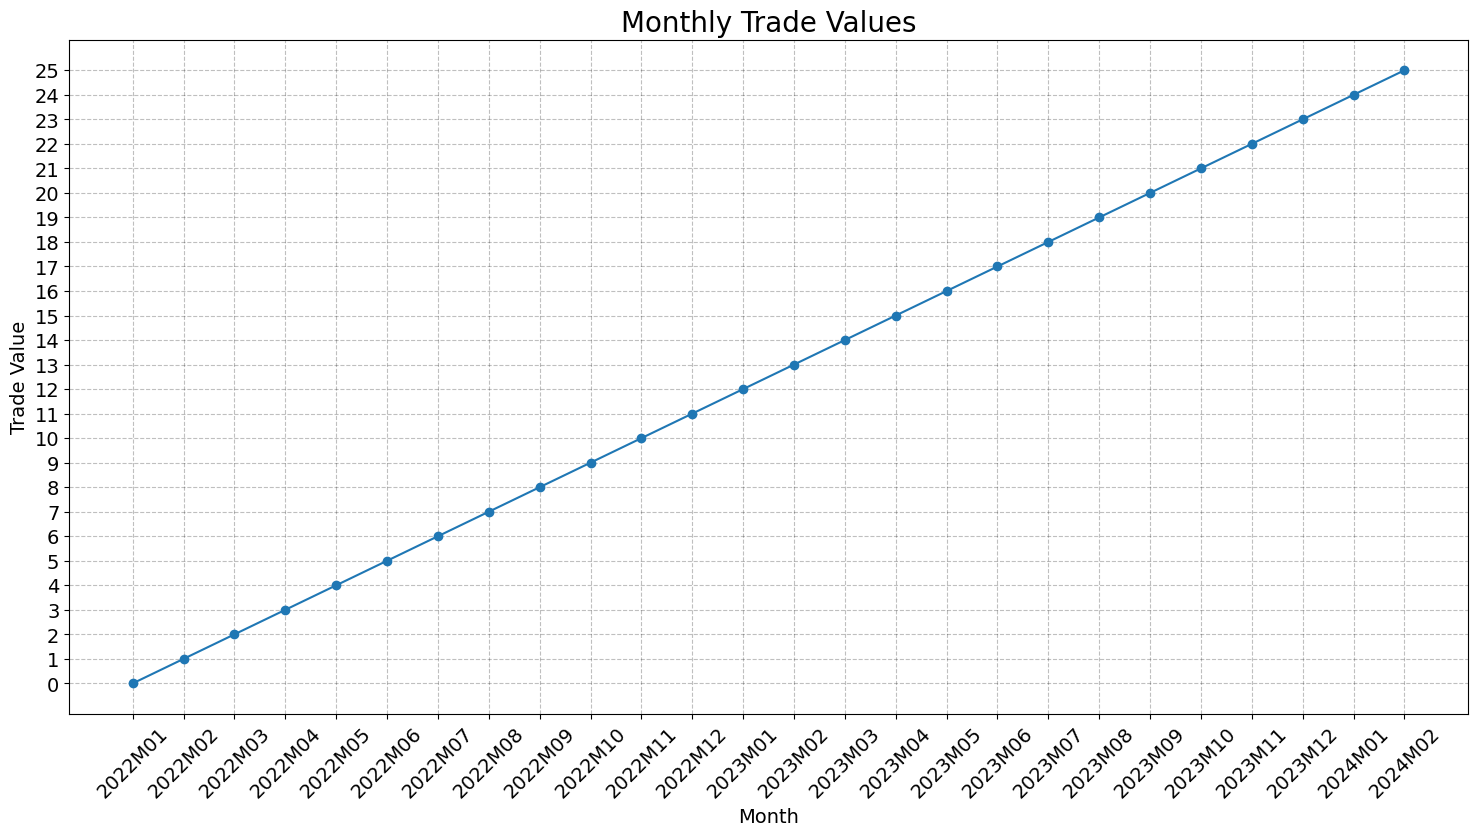

                 POST    INDUD               LAND        ENHED  \
0  GOODS AND SERVICES  Imports  REST OF THE WORLD  Million DKK   
1  GOODS AND SERVICES  Imports  REST OF THE WORLD  Million DKK   
2  GOODS AND SERVICES  Imports  REST OF THE WORLD  Million DKK   
3  GOODS AND SERVICES  Imports  REST OF THE WORLD  Million DKK   
4  GOODS AND SERVICES  Imports  REST OF THE WORLD  Million DKK   

                 SÆSON      TID   INDHOLD  
0  Seasonally adjusted  2022M01  126789.4  
1  Seasonally adjusted  2022M02  124966.4  
2  Seasonally adjusted  2022M03  133248.7  
3  Seasonally adjusted  2022M04  139747.5  
4  Seasonally adjusted  2022M05  139862.3  
Index(['POST', 'INDUD', 'LAND', 'ENHED', 'SÆSON', 'TID', 'INDHOLD'], dtype='object')


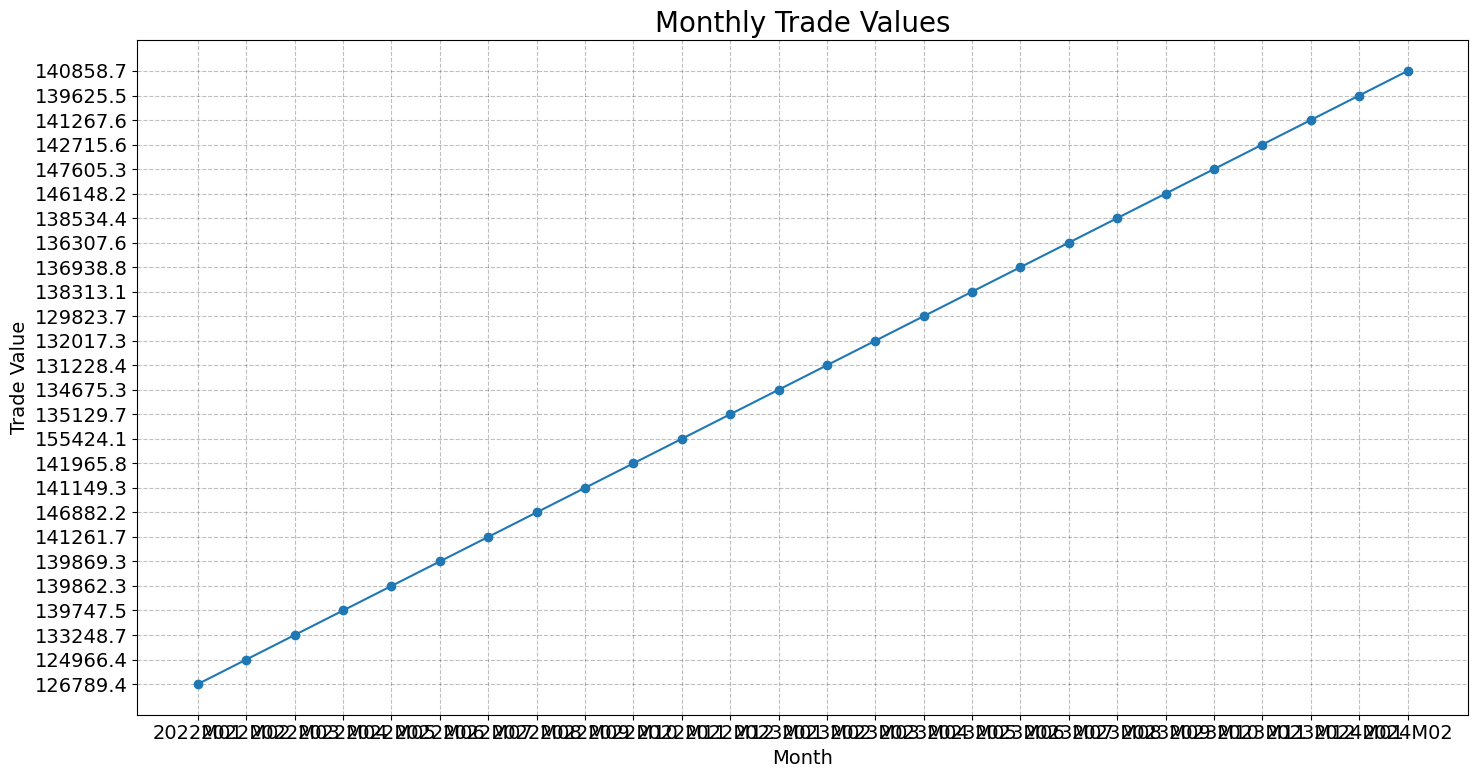

In [66]:
plt.figure(figsize=(15, 8))  # Set the size of the graph
plt.plot(data['TID'], data['INDHOLD'], marker='o')  # Plot the line graph with markers

# Format the y-axis labels with commas for thousands
plt.gca().get_yaxis().set_major_formatter(
    plt.matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.title('Monthly Trade Values', fontsize=20)  # Set the title of the graph
plt.xlabel('Month', fontsize=14)  # Set the label for the x-axis
plt.ylabel('Trade Value', fontsize=14)  # Set the label for the y-axis

plt.grid(True)  # Enable the grid
plt.tight_layout()  # Adjust the layout
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability

plt.show()  # Display the graph


print(data.head())
print(data.columns)

plt.figure(figsize=(15, 8))  # Increased figure size
plt.plot(data['TID'], data['INDHOLD'], marker='o')
plt.title('Monthly Trade Values', fontsize=20)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Trade Value', fontsize=14)
# Adjust grid
plt.grid(True)

plt.tight_layout()  # Adjust layout to make room for x-axis labels
plt.show()

Explain what you see when moving elements of the interactive plot around. 

# Import

Now you create combinations of your loaded data sets. Remember the illustration of a (inner) **merge**:

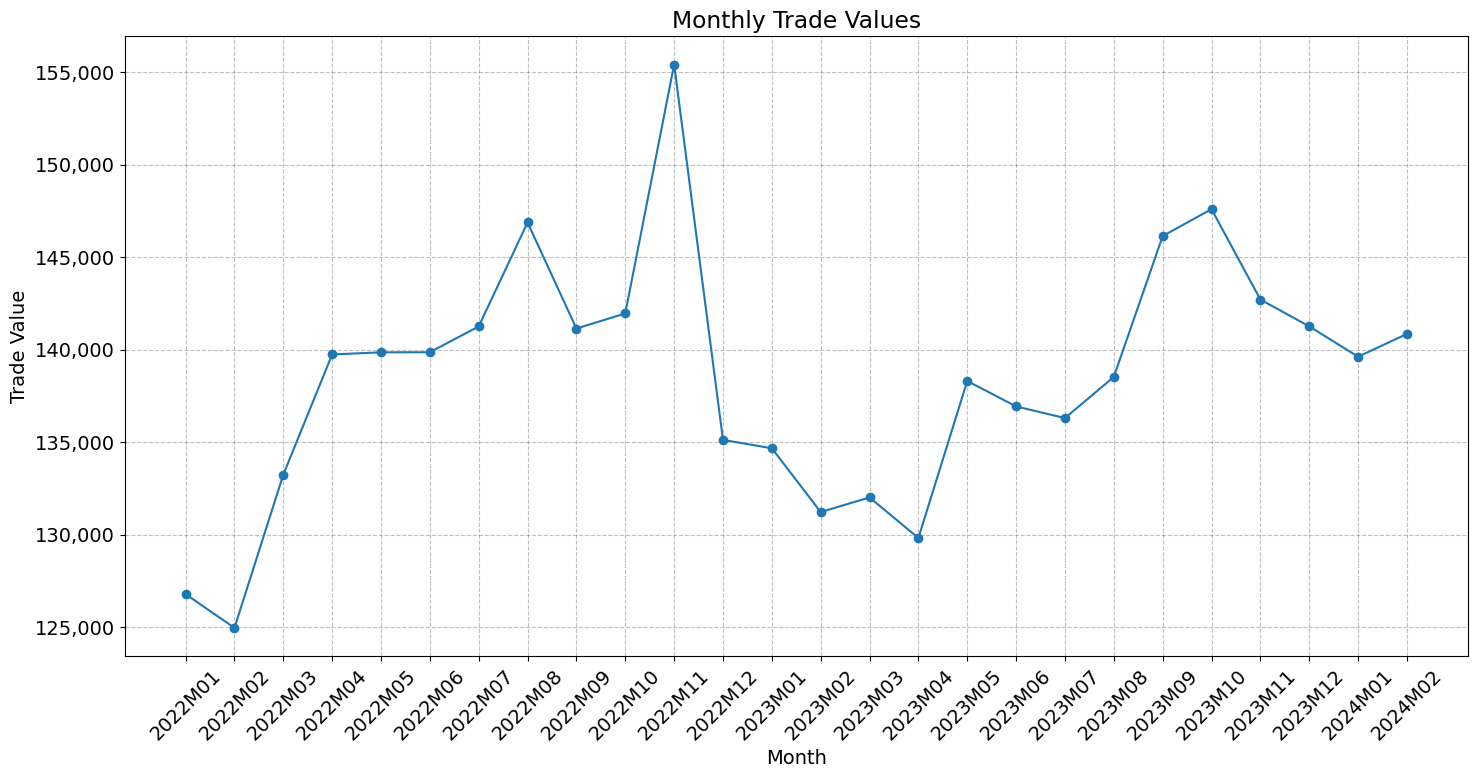

In [67]:
data = pd.DataFrame({
    'Month': ['2022M01', '2022M02', '2022M03', '2022M04', '2022M05', '2022M06', '2022M07', '2022M08', '2022M09', '2022M10', '2022M11', '2022M12',
              '2023M01', '2023M02', '2023M03', '2023M04', '2023M05', '2023M06', '2023M07', '2023M08', '2023M09', '2023M10', '2023M11', '2023M12',
              '2024M01', '2024M02'],
    'Trade Value': ['126789.4', '124966.4', '133248.7', '139747.5', '139862.3', '139869.3', '141261.7', '146882.2', '141149.3', '141965.8', '155424.1', '135129.7',
                    '134675.3', '131228.4', '132017.3', '129823.7', '138313.1', '136938.8', '136307.6', '138534.4', '146148.2', '147605.3', '142715.6', '141267.6',
                    '139625.5', '140858.7']  # These are string values
})

# Convert 'Trade Value' to numeric type
data['Trade Value'] = pd.to_numeric(data['Trade Value'])

# Plotting the graph
plt.figure(figsize=(15, 8))
plt.plot(data['Month'], data['Trade Value'], marker='o')

# Format the y-axis labels with commas for thousands
plt.gca().get_yaxis().set_major_formatter(
    plt.matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.title('Monthly Trade Values')
plt.xlabel('Month')
plt.ylabel('Trade Value')

plt.grid(True)
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust layout to make room for x-axis labels

plt.show()

Here we are dropping elements from both data set X and data set Y. A left join would keep all observations in data X intact and subset only from Y. 

Make sure that your resulting data sets have the correct number of rows and columns. That is, be clear about which observations are thrown away. 

**Note:** Don't make Venn diagrams in your own data project. It is just for exposition. 

# Export

In [69]:
Export = DstApi('UHM') 
tabsum = Export.tablesummary(language='en')
display(tabsum)

# The available values for a each variable: 
for variable in tabsum['variable name']:
    print(variable+':')
    display(Export.variable_levels(variable, language='en'))

params = Export._define_base_params(language='en')  # Returns a view, that we can edit
params

variables = params['variables']
variables[0]['values'] = ['1.A']
variables[1]['values'] =['2']
variables[2]['values'] = ['W1']
variables[3]['values'] = ['93']
variables[4]['values'] = ['2']
variables[5]['values'] = ['2022M01', '2022M02', '2022M03', '2022M04', '2022M05', '2022M06', '2022M07', '2022M08', '2022M09', '2022M10', '2022M11', '2022M12',
'2023M01', '2023M02', '2023M03', '2023M04', '2023M05', '2023M06', '2023M07', '2023M08', '2023M09', '2023M10', '2023M11', '2023M12',
'2024M01', '2024M02']
params

data = Export.get_data(params=params)
data.head(5)


Table UHM: External trade monthly by items, imports and exports, country, unit, seasonal adjustment and time
Last update: 2024-04-09T08:00:00


,variable name,# values,First value,First value label,Last value,Last value label,Time variable
0,POST,23,1.A,GOODS AND SERVICES,1.A.B.X,Other services,False
1,INDUD,2,1,Imports,2,Exports,False
2,LAND,11,W1,REST OF THE WORLD,CN,China,False
3,ENHED,4,93,Million DKK,102,Percentage change (year),False
4,SÆSON,2,1,Non-seasonally adjusted,2,Seasonally adjusted,False
5,Tid,170,2010M01,2010M01,2024M02,2024M02,True


POST:


,id,text
0,1.A,GOODS AND SERVICES
1,1.A.A,GOODS (FOB)
2,1.A.A.1.Z,GOODS THAT CROSSES DANISH BORDERS
3,1.A.A.1.0-4X2-3,"Live animals, Food, Beverages And Tobacco"
4,1.A.A.1.2,"Crude Materials, Inedible, Except Fuels"
5,1.A.A.1.3,"Mineral Fuels, Lubricants And Related Materials"
6,1.A.A.1.5,Chemicals And Related Products
7,1.A.A.1.6,Manufactured Goods Classified Chiefly By Material
8,1.A.A.1.7X78-79,Machinery (excl. Transport Equipment)
9,1.A.A.1.78-79,"Transport Equipment (excl. Vessels, aircraft e..."


INDUD:


,id,text
0,1,Imports
1,2,Exports


LAND:


,id,text
0,W1,REST OF THE WORLD
1,B6,EU-27 (without the United Kingdom)
2,FR,France
3,NL,Netherlands
4,SE,Sweden
5,DE,Germany
6,D6,Extra EU-27
7,NO,Norway
8,GB,United Kingdom
9,US,United States


ENHED:


,id,text
0,93,Million DKK
1,100,Percentage change (month)
2,101,Percentage change (3 months)
3,102,Percentage change (year)


SÆSON:


,id,text
0,1,Non-seasonally adjusted
1,2,Seasonally adjusted


Tid:


,id,text
0,2010M01,2010M01
1,2010M02,2010M02
2,2010M03,2010M03
3,2010M04,2010M04
4,2010M05,2010M05
...,...,...
165,2023M10,2023M10
166,2023M11,2023M11
167,2023M12,2023M12
168,2024M01,2024M01


,POST,INDUD,LAND,ENHED,SÆSON,TID,INDHOLD
0,GOODS AND SERVICES,Exports,REST OF THE WORLD,Million DKK,Seasonally adjusted,2022M01,145203.1
1,GOODS AND SERVICES,Exports,REST OF THE WORLD,Million DKK,Seasonally adjusted,2022M02,150254.3
2,GOODS AND SERVICES,Exports,REST OF THE WORLD,Million DKK,Seasonally adjusted,2022M03,160273.6
3,GOODS AND SERVICES,Exports,REST OF THE WORLD,Million DKK,Seasonally adjusted,2022M04,159550.4
4,GOODS AND SERVICES,Exports,REST OF THE WORLD,Million DKK,Seasonally adjusted,2022M05,166175.7


MAKE FURTHER ANALYSIS. EXPLAIN THE CODE BRIEFLY AND SUMMARIZE THE RESULTS.

# Conclusion

ADD CONCISE CONLUSION.